In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Review: Linear Regression

In [11]:
#load in mtcars.csv

cars = pd.read_csv('./data/mtcars.csv')


In [12]:
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
#build regression to predict hp using mpg

X = cars[['mpg']]

y = cars['hp']

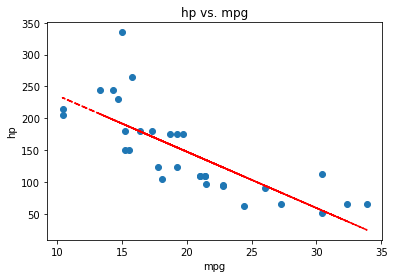

In [13]:
#plot results

#instantiate and fitting in one line
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X, y)

#predict
yhat = lr.predict(X) #when we fit we get the equation hp = Bo + B1xmpg, yhat makes predictions using X and (X, y)

#plot 
plt.scatter(X, y,) #two continuous features - blue points = actual data 
plt.plot(cars['mpg'], yhat, '--r') #predictions 
plt.xlabel('mpg')
plt.ylabel('hp')
plt.title('hp vs. mpg');


In [14]:
lr.coef_

array([-8.82973099])

In [15]:
lr.intercept_

324.0823142125205

In [9]:
#mean squared error

from sklearn.metrics import mean_squared_error

mean_squared_error(y, yhat) #on average how "off" were predictions, can compare to other models to find the best model

1810.4863703431888

### Bias-Variance: The Sweet Spot

### Bias and Variance in Sampling

- Take simple random samples of size 10
- Take simple random samples of size 100

In [16]:
population = np.random.normal(30, 8, 10_000)

In [17]:
#samples of size 10 -- repeat 1000 times
population = np.random.normal(30, 8, 10_000)
s1 = [np.mean(np.random.choice(population, size = 10)) for _ in range(1000)]
s2 = [np.mean(np.random.choice(population, size = 100)) for _ in range(1000)]

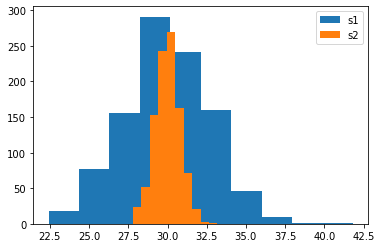

In [21]:
#histograms of each

plt.hist(s1, label = 's1')
plt.hist(s2, label = 's2')
plt.legend();


In [ ]:
#s1 = more variance, higher spread 

### Regression Setting

In [ ]:
cars = pd.read_csv('data/mtcars.csv')

In [ ]:
#mpg vs. hp


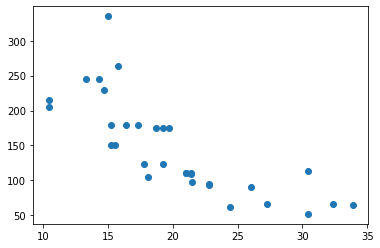

In [23]:
#scatterplot

plt.scatter(X, y); #what we're going to be building our model on

### Reminder on Least Squares

$$f(m, b) = \sum_{i = 1}^n (y_i - (mx_i + b))^2$$

In [ ]:
#fit model
from sklearn.linear_model import LinearRegression


In [ ]:
#plot residuals


In [ ]:
#Any assumptions violated?  Why?


### Reminder: Quadratics

$$f(x) = ax^2 + bx + c$$


$$f(a, b, c) = \sum_{i = 1}^n (y_i - (ax_i^2 + bx_i + c))^2$$

In [25]:
#examine X
X.head(2) #a dataframe 

,mpg
0,21.0
1,21.0


In [26]:
#add new feature

X['mpg^2'] = X['mpg']**2 #use as coefficient in linear regression model
X.head(2) #now X has two features 

/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_872/617311101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['mpg^2'] = X['mpg']**2


,mpg,mpg^2
0,21.0,441.0
1,21.0,441.0


In [27]:
#build model on quadratic data 

qr = LinearRegression().fit(X, y)


In [28]:
#look at coefficients

qr.coef_

array([-23.34451763,   0.33002884])

In [29]:
#intercept will be our constant 

qr.intercept_

470.86947158376046

In [31]:
#residuals = our error 

resids = y - qr.predict(X)

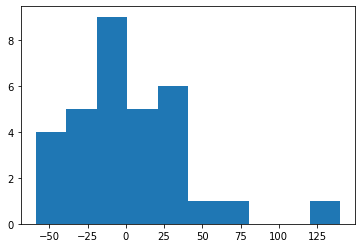

In [33]:
#plot these

plt.hist(resids);

#Is the model biased? 

    #more error below zero than above zero 
    #125 = big error, going to pull model away from the rest of the data 
        # data point is going to cause some problems 


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

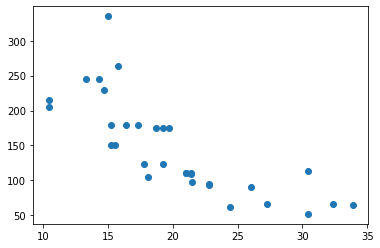

In [69]:
#plot predictions - spot where some of the issues are 

plt.scatter(X.iloc[:, 0], y) #make sure to grab just the linear column
plt.scatter(X.iloc[:, 0], qr.predict(X), color = 'red'); #can more clearly see that outlier, going to pull line up

#more data below the line than above - this is due to bias pulling away from the true trend 





In [39]:
mean_squared_error(y, qr.predict(X)) #quadratic predictions and mse

#better than the 1810 in the first model 

1623.1102840474193

In [40]:
mean_squared_error(y, yhat) #linear predictions mse

1810.4863703431888

In [41]:
mean_squared_error(y, qr.predict(X), squared = False) #off by 40 

40.287842881537095

In [42]:
mean_squared_error(y, yhat, squared = False) #off by 42

42.54981046189499

In [44]:
qr.coef_

array([-23.34451763,   0.33002884])

In [ ]:
#how would you build a cubic model? 

In [52]:
X['mpg^3'] = X['mpg']**3

/var/folders/2w/wbx4r95918vggzcgwttq04gh0000gn/T/ipykernel_872/1139727504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['mpg^3'] = X['mpg']**3


In [56]:
X.head(2)

,mpg,mpg^2,mpg^3
0,21.0,441.0,9261.0
1,21.0,441.0,9261.0


In [59]:
cr = LinearRegression().fit(X, y)

In [60]:
qr.coef_

array([-23.34451763,   0.33002884])

In [61]:
resids = y - cr.predict(X)

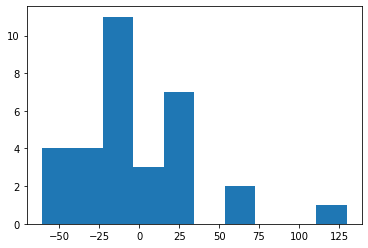

In [62]:
plt.hist(resids);

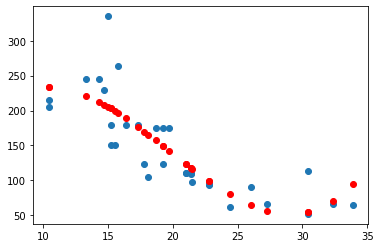

In [67]:
plt.scatter(X.iloc[:, 0], y) #make sure to grab just the linear column
plt.scatter(X.iloc[:, 0], cr.predict(X), color = 'red');

In [64]:
mean_squared_error(y, cr.predict(X))

1423.5806168861798

In [65]:
mean_squared_error(y, cr.predict(X), squared = False)

37.730367303886396

In [ ]:
#issues: 

    #because we have more complex model, more particular to the data it was trained on 
    #if another car comes along, might do worse at predicting 